In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the train and test data
df_train = pd.read_csv('Loan_Train.csv')
df_test = pd.read_csv('Loan_Test.csv')

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#sahpe f the data frame
df_train.shape

(614, 13)

In [5]:
#Information about the each column in data set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#finding the statistical measures like mean median and mode
df_train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002820,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [7]:
nan_features = [feature for feature in df_train.columns if df_train[feature].isnull().sum()] 

In [8]:
nan_features

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [9]:
# percentage of the missing values
for feature in nan_features:
    print(feature, 'has ',round(100*(df_train[feature].isnull().sum()/len(df_train[feature].index)),1), '% missing values')

Gender has  2.1 % missing values
Married has  0.5 % missing values
Dependents has  2.4 % missing values
Self_Employed has  5.2 % missing values
LoanAmount has  3.6 % missing values
Loan_Amount_Term has  2.3 % missing values
Credit_History has  8.1 % missing values


In [10]:
df_categ = df_train.select_dtypes(include = ['O'])
print('There is {} categorical features including:\n{}'.format(len(df_categ.columns), df_categ.columns.tolist()))

There is 8 categorical features including:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [11]:
num_features = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']

print(num_features)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [12]:
# filling the nan values for multiple categorical columns
for col in df_categ:
    df_train[col] = df_train[col].fillna(df_train[col].value_counts().idxmax())

In [13]:
df_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
# filling the nan values for multiple numerical columns
for col in num_features:
    df_train[col] = df_train[col].fillna(df_train[col].median())

In [15]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df_train.to_excel('final_train.xlsx')

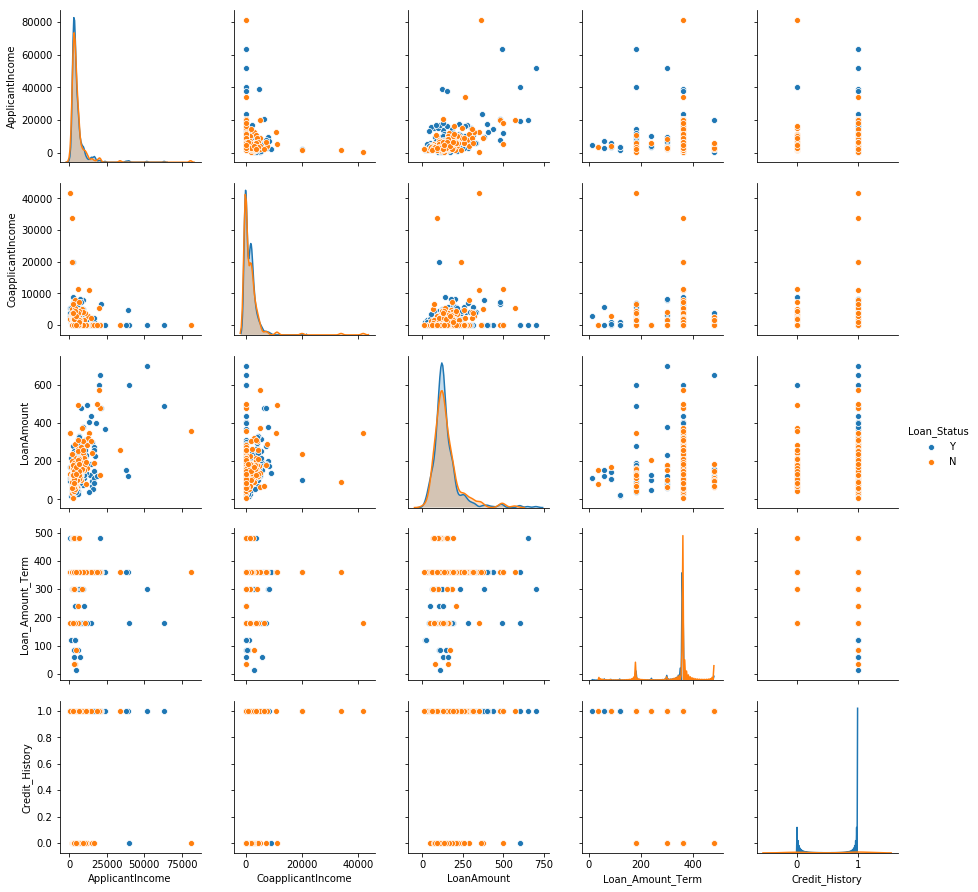

In [17]:
#pair plot for data set as Loan status taking as  A hue
sns.pairplot(df_train,hue = 'Loan_Status')

In [18]:
df_train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


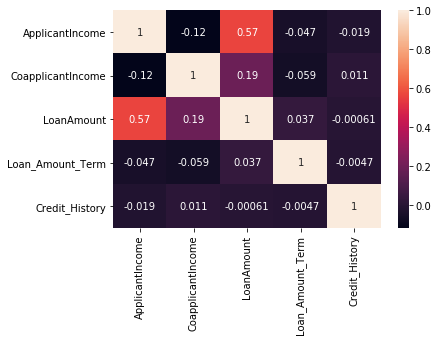

In [19]:
sns.heatmap(df_train.corr(),annot=True)
plt.show()

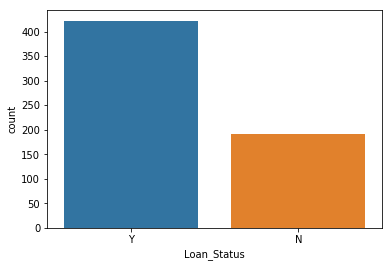

In [20]:
sns.countplot(df_train.Loan_Status)

In [21]:
stack_gender=pd.crosstab([df_train['Credit_History'],df_train['Gender']],df_train['Loan_Status'])
stack_gender

Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    66    6
1.0            Female  21   74
               Male    89  341

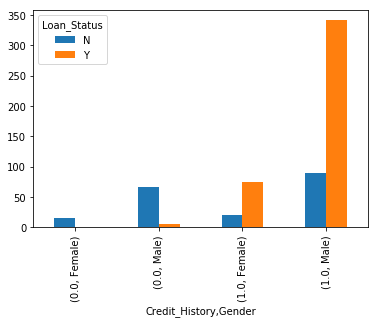

In [22]:
stack_gender.plot(kind='bar',stacked=False,grid=False)

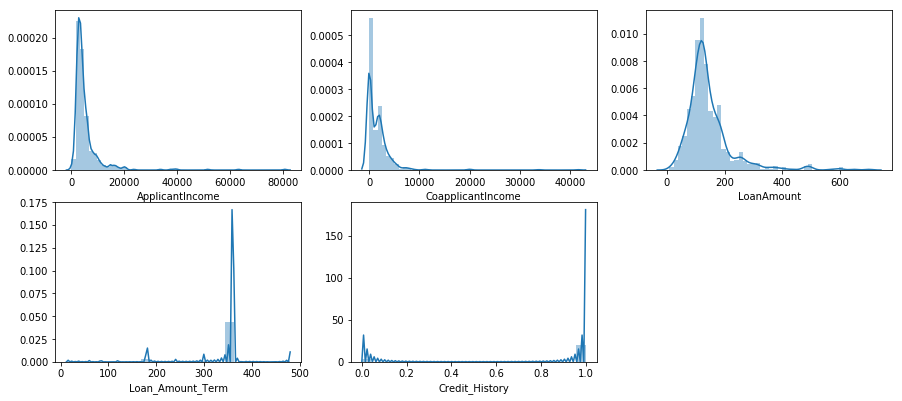

In [23]:
fig = plt.figure(figsize = (15, 10))
j=0
for i in num_features:
    plt.subplot(3, 3, j+1)
    j +=1
    sns.distplot(df_train[i])
plt.show()

In [24]:
df_train.Loan_Status = df_train.Loan_Status.replace(to_replace = 'Y',value = 1)
df_train.Loan_Status = df_train.Loan_Status.replace(to_replace = 'N',value = 0)
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
X = df_train.drop(columns = ['Loan_ID','Loan_Status'],axis = 1)
y = df_train['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [27]:
Xd = pd.get_dummies(X)


In [28]:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(Xd), columns = Xd.columns)

x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,-0.554487,-0.211241,0.273231,0.411733,-0.472343,0.472343,1.372089,-1.372089,0.839974,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,0.392601,-0.392601,-0.641478,-0.782016,1.428147
1,-0.134412,-0.038732,-0.211241,0.273231,0.411733,-0.472343,0.472343,-0.728816,0.728816,-1.190514,2.240448,-0.443713,-0.300975,0.528362,-0.528362,0.392601,-0.392601,1.558899,-0.782016,-0.700208
2,-0.393747,-0.554487,-0.948996,0.273231,0.411733,-0.472343,0.472343,-0.728816,0.728816,0.839974,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,-2.547117,2.547117,-0.641478,-0.782016,1.428147
3,-0.462062,0.251980,-0.306435,0.273231,0.411733,-0.472343,0.472343,-0.728816,0.728816,0.839974,-0.446339,-0.443713,-0.300975,-1.892641,1.892641,0.392601,-0.392601,-0.641478,-0.782016,1.428147
4,0.097728,-0.554487,-0.056551,0.273231,0.411733,-0.472343,0.472343,1.372089,-1.372089,0.839974,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,0.392601,-0.392601,-0.641478,-0.782016,1.428147


In [29]:
import imblearn
from imblearn.over_sampling import SMOTE

In [30]:
x_resmaple,y_resample = SMOTE().fit_resample(x,y)

In [31]:
np.savez('DT.npz',x_resmaple,y_resample)

In [32]:
df_over = np.load('DT.npz')
df_over.files

['arr_0', 'arr_1']

In [33]:
x_over = df_over['arr_0']
y_over = df_over['arr_1']


In [34]:
X_train,X_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.2,random_state = 4)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(675, 20) (169, 20) (675,) (169,)


In [35]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree = ExtraTreesClassifier().fit(X_train,y_train)


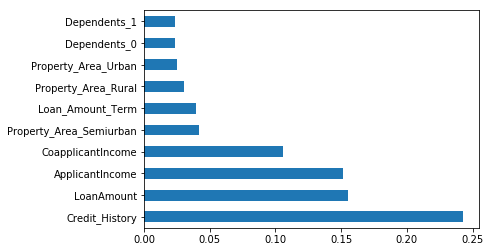

In [36]:
imp_feat = pd.Series(extra_tree.feature_importances_, index = Xd.columns)
imp_feat.nlargest(10).plot(kind = 'barh')

In [37]:
imp_feat.sort_values()

Dependents_2               0.013893
Gender_Female              0.014304
Self_Employed_Yes          0.015429
Education_Not Graduate     0.015891
Dependents_3+              0.016073
Gender_Male                0.016089
Education_Graduate         0.016656
Self_Employed_No           0.016661
Married_Yes                0.017373
Married_No                 0.018914
Dependents_1               0.023671
Dependents_0               0.023919
Property_Area_Urban        0.024902
Property_Area_Rural        0.030682
Loan_Amount_Term           0.039222
Property_Area_Semiurban    0.041604
CoapplicantIncome          0.106069
ApplicantIncome            0.151027
LoanAmount                 0.155118
Credit_History             0.242503
dtype: float64

In [38]:
cols = ['Credit_History','LoanAmount','ApplicantIncome','CoapplicantIncome','Property_Area_Semiurban',
       'Loan_Amount_Term','Property_Area_Rural','Dependents_0','Married_Yes','Dependents_2','Education_Graduate',
       'Self_Employed_Yes','Gender_Female']

### Decision Tree

In [39]:
model_tree = DecisionTreeClassifier().fit(X_train,y_train)


In [40]:
y_pred_tree = model_tree.predict(X_test)
y_prob_tree = model_tree.predict_proba(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


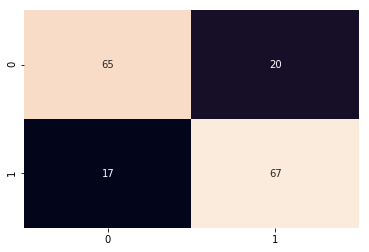

In [42]:
cm = confusion_matrix(y_test,y_pred_tree)

sns.heatmap(cm, annot= True, fmt = '.2g',cbar = False)

In [43]:
cr = classification_report(y_test,y_pred_tree)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        85
           1       0.77      0.80      0.78        84

    accuracy                           0.78       169
   macro avg       0.78      0.78      0.78       169
weighted avg       0.78      0.78      0.78       169



### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model_random = RandomForestClassifier(n_estimators=20, criterion='gini',
                              max_features = 0.2)

In [46]:
model_random.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
y_pred_rf = model_random.predict(X_test)

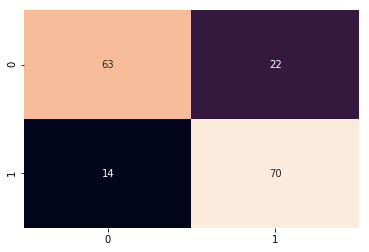

In [48]:
cm = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot = True,fmt='.2g',cbar = False)

In [49]:
cr = classification_report(y_test,y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        85
           1       0.76      0.83      0.80        84

    accuracy                           0.79       169
   macro avg       0.79      0.79      0.79       169
weighted avg       0.79      0.79      0.79       169



In [50]:
kappa_score = cohen_kappa_score(y_test,y_pred_rf)
print('Kappa Score: ', kappa_score)

AUC_score = roc_auc_score(y_test,y_pred_rf)
print('roc_auc_score: ', AUC_score)

Kappa Score:  0.5741881298992161
roc_auc_score:  0.7872549019607844


### Parameter Tuning GridSearch CV

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
tuned_parameter = [{'n_estimators':[10,20,30],
                   'criterion':['gini','entropy'],
                   'max_depth':[10,15],
                   'max_features':['sqrt','log2']}]

In [53]:
model_tune = RandomForestClassifier()

In [54]:
gridcv = GridSearchCV(model_tune,param_grid = tuned_parameter,cv = 10,
                   scoring='roc_auc')
gridcv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [55]:
y_prob_cv = gridcv.predict_proba(X_test)
y_pred_cv = gridcv.predict(X_test)

Text(24.0, 0.5, 'True Values')

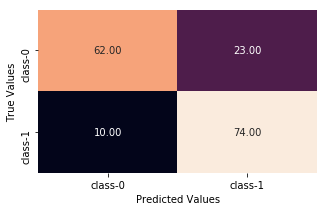

In [56]:
cm = confusion_matrix(y_test,y_pred_cv)

plt.figure(figsize = (5,3))

sns.heatmap(cm,annot = True,fmt = '0.2f',xticklabels=['class-0','class-1'],
           yticklabels=['class-0','class-1'],cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

In [57]:
cr = classification_report(y_test,y_pred_cv)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        85
           1       0.76      0.88      0.82        84

    accuracy                           0.80       169
   macro avg       0.81      0.81      0.80       169
weighted avg       0.81      0.80      0.80       169



In [58]:
kappa_score = cohen_kappa_score(y_test,y_pred_cv)
print('Kappa Score: ', kappa_score)

AUC_score = roc_auc_score(y_test,y_pred_cv)
print('roc_auc_score: ', AUC_score)

Kappa Score:  0.6098089974113202
roc_auc_score:  0.8051820728291318


### Test data feature engineering

In [59]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [60]:
df_test.shape

(367, 12)

In [61]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [62]:
df_test_cat = df_test.select_dtypes(include = ['O'])
print('There is {} categorical features including:\n{}'.format(len(df_test_cat.columns), df_test_cat.columns.tolist()))

There is 7 categorical features including:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [63]:
# filling the nan values for multiple categorical columns
for col in df_test_cat:
    df_test[col] = df_test[col].fillna(df_test[col].value_counts().idxmax())

In [64]:
# filling the nan values for multiple numerical columns
for col in num_features:
    df_test[col] = df_test[col].fillna(df_test[col].median())

In [65]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [66]:
X_test = df_test.drop(['Loan_ID'],axis = 1)
dX_test = pd.get_dummies(X_test)
test_data = pd.DataFrame(sc.fit_transform(dX_test), columns = dX_test.columns)
test_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.426780,0.266022,0.437674,-0.485479,0.485479,-0.758358,0.758358,0.864650,-0.433246,-0.437674,-0.349749,0.544812,-0.544812,0.334845,-0.334845,-0.658478,-0.679817,1.273353
1,-0.352692,-0.029848,-0.163953,0.266022,0.437674,-0.485479,0.485479,-0.758358,0.758358,-1.156538,2.308156,-0.437674,-0.349749,0.544812,-0.544812,0.334845,-0.334845,-0.658478,-0.679817,1.273353
2,0.039641,0.098849,1.183033,0.266022,0.437674,-0.485479,0.485479,-0.758358,0.758358,-1.156538,-0.433246,2.284806,-0.349749,0.544812,-0.544812,0.334845,-0.334845,-0.658478,-0.679817,1.273353
3,-0.502774,0.418877,-0.591047,0.266022,0.437674,-0.485479,0.485479,-0.758358,0.758358,-1.156538,-0.433246,2.284806,-0.349749,0.544812,-0.544812,0.334845,-0.334845,-0.658478,-0.679817,1.273353
4,-0.311909,-0.673335,-0.952433,0.266022,0.437674,-0.485479,0.485479,1.318638,-1.318638,0.864650,-0.433246,-0.437674,-0.349749,-1.835497,1.835497,0.334845,-0.334845,-0.658478,-0.679817,1.273353


In [67]:
test_data.shape

(367, 20)

In [68]:
y_pred_test = gridcv.predict(test_data)
test_data['Loan_Status'] = y_pred_test

In [69]:
test_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.186461,-0.673335,-0.426780,0.266022,0.437674,-0.485479,0.485479,-0.758358,0.758358,0.864650,...,-0.437674,-0.349749,0.544812,-0.544812,0.334845,-0.334845,-0.658478,-0.679817,1.273353,0
1,-0.352692,-0.029848,-0.163953,0.266022,0.437674,-0.485479,0.485479,-0.758358,0.758358,-1.156538,...,-0.437674,-0.349749,0.544812,-0.544812,0.334845,-0.334845,-0.658478,-0.679817,1.273353,0
2,0.039641,0.098849,1.183033,0.266022,0.437674,-0.485479,0.485479,-0.758358,0.758358,-1.156538,...,2.284806,-0.349749,0.544812,-0.544812,0.334845,-0.334845,-0.658478,-0.679817,1.273353,1
3,-0.502774,0.418877,-0.591047,0.266022,0.437674,-0.485479,0.485479,-0.758358,0.758358,-1.156538,...,2.284806,-0.349749,0.544812,-0.544812,0.334845,-0.334845,-0.658478,-0.679817,1.273353,1
4,-0.311909,-0.673335,-0.952433,0.266022,0.437674,-0.485479,0.485479,1.318638,-1.318638,0.864650,...,-0.437674,-0.349749,-1.835497,1.835497,0.334845,-0.334845,-0.658478,-0.679817,1.273353,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.162439,0.088982,-0.377500,0.266022,0.437674,-0.485479,0.485479,-0.758358,0.758358,-1.156538,...,-0.437674,2.859196,-1.835497,1.835497,-2.986456,2.986456,-0.658478,-0.679817,1.273353,1
363,-0.132056,-0.369180,-0.344647,0.266022,0.437674,-0.485479,0.485479,-0.758358,0.758358,0.864650,...,-0.437674,-0.349749,0.544812,-0.544812,0.334845,-0.334845,-0.658478,-0.679817,1.273353,0
364,-0.317211,0.181644,-0.163953,0.266022,0.437674,-0.485479,0.485479,1.318638,-1.318638,0.864650,...,-0.437674,-0.349749,0.544812,-0.544812,0.334845,-0.334845,-0.658478,1.470984,-0.785328,1
365,0.039641,0.353241,0.361700,0.266022,0.437674,-0.485479,0.485479,-0.758358,0.758358,0.864650,...,-0.437674,-0.349749,0.544812,-0.544812,0.334845,-0.334845,1.518653,-0.679817,-0.785328,0


In [70]:
test_data.to_csv('predicted_test.csv')

### Without balancing the data all the  classifiers accuracies 

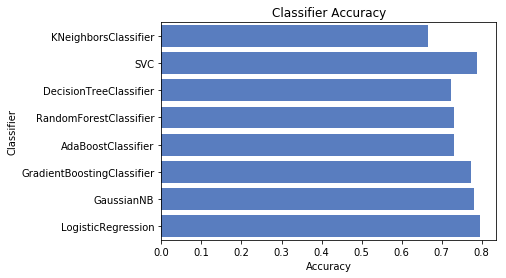

In [71]:
# Define classifiers in a list
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    
    LogisticRegression()]
# create new dataframe for accuracy and classifier
new_cols = ["Classifier", "Accuracy"]
data_clf = pd.DataFrame(columns=new_cols)
#split the data into train and test 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)



acc_dict = {}


    

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
     
    data_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=new_cols)
    data_clf = data_clf.append(data_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=data_clf, color="b")

### With Balancing the dataset all the classifiers accuracies

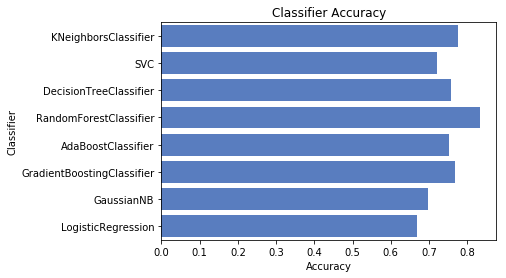

In [72]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    #LinearDiscriminantAnalysis(),
    #QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log      = pd.DataFrame(columns=log_cols)

X_train,X_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.2,random_state = 4)



acc_dict = {}


    

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] 
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [73]:
cols 

['Credit_History',
 'LoanAmount',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Property_Area_Semiurban',
 'Loan_Amount_Term',
 'Property_Area_Rural',
 'Dependents_0',
 'Married_Yes',
 'Dependents_2',
 'Education_Graduate',
 'Self_Employed_Yes',
 'Gender_Female']

In [74]:
x_over = pd.DataFrame(x_over, columns = x.columns)

In [75]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(x_over[cols],y_over,test_size = 0.2,random_state = 4)
print(X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape)


(675, 13) (169, 13) (675,) (169,)


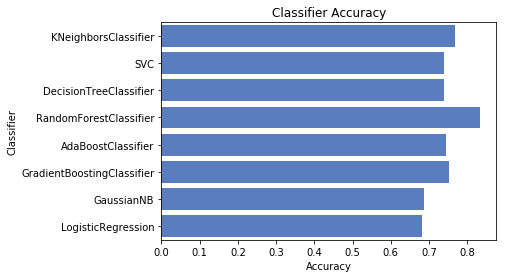

In [76]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    #LinearDiscriminantAnalysis(),
    #QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log      = pd.DataFrame(columns=log_cols)

#X_train,X_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.2,random_state = 4)



acc_dict = {}


    

for classi in classifiers:
    name = classi.__class__.__name__
    classi.fit(X_train1, y_train1)
    train_predictions = classi.predict(X_test1)
    acc = accuracy_score(y_test1, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for classi in acc_dict:
    acc_dict[classi] = acc_dict[classi] 
    log_entry = pd.DataFrame([[classi, acc_dict[classi]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [77]:
test_data1 = test_data.copy()